# Исследование рынка общественного питания Москвы

- Автор: Лазарева Елизавета Сергеевна
- Дата: 11.03.2025

### Цели и задачи проекта

Провести исследовательский анализ рынка общественного питания Москвы, помочь с выявлением места общественного питания, подходящего инвесторам.

### Описание данных

Данные состоят из двух датасетов:
* `datasets/rest_info.csv` - информация о заведениях общественного питания;
* `datasets/rest_price.csv` - информация о среднем чеке в заведениях общественного питания.
    
#### Описание датасета `rest_info`:
* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - `0` — заведение не является сетевым;
  - `1` — заведение является сетевым.
* `seats` — количество посадочных мест.

#### Описание датасета `rest_price`:
* `price` — категория цен в заведении;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино».

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации
---

## 1. Загрузка данных и знакомство с ними

Загрузим необходимые библиотеки и данные о заведениях общественного питания Москвы. Затем выведем основную информацию о данных и первые пять строк датафреймов. 

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [2]:
# Выгрузим данные 


In [3]:
# Выведем первые пять строк датафрейма rest_info
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выведем основную информацию датафрейма rest_info
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выведем первые 5 строк датафрейма rest_price
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выведем основную информацию датафрейма rest_price
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


Датасет `rest_info` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.

Изучим типы данных в столбцах:
* `id`, `name`, `category`, `address`, `district`, `hours` имеют тип данных `object`. Этот тип данных для них корректен, так как они содержат строковую информацию.
* `rating` содержит значения от 1 до 5 с дробной частью, поэтому тип `float` корректен для данного столбца. Рекомендуется понизить разрядность до `float32`.
* `chain` может принимать значение `0` или `1`, для данного столбца подходит тип `int` с понижением разрядности до `int8`.
* `seats` содержит информацию о количестве мест в заведении, оно может быть представлено только целым числом. Поэтому для данного столбца рекомендуется использовать тип данных `int16`.

После анализа видно, что один из восьми столбцов представлен некорректно. В двух столбцах присутствуют пропуски. Названия столбцов представленны в едином стиле, значения в столбцах совпадают с описанием. 

Датасет `rest_price` содержит 5 столбцов и 4058 строк.

После первичного анализа можно сделать выводы:
* `id`, `price`, `avg_bill` хранят сроковые значения и имеют тип данных `object`. 
* `middle_avg_bill`, `middle_coffee_price` хранят информацию о средней цене и имеют тип данных `float64`.
* Четыре столбца имеют пропуски.
* Названия столбцов представленны в едином стиле и значения в столбцах совпадают с описанием.

Первичное знакомство показывает, что в датасетах имеется большое количество пропусков.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один. Соединять данные будем по `id` заведения. Используем значение параметра `how = 'left'`, поскольку для дальнейшей работы нам важны данные из датафрейма `rest_info`.

In [7]:
# Объединим данные в единый датафрейм rest
rest = rest_info.merge(rest_price, on = 'id', how = 'left')

In [8]:
# Выводим информацию о датафрейме
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соединены.

## 2. Предобработка данных

Понизим разрядность для столбца `chain`. Столбец `seats` не получится преобразовать из `float` в `integer`, поскольку в нем присутствуют пропуски.

In [9]:
rest['chain'] = pd.to_numeric(rest['chain'], errors = 'coerce', downcast = 'integer')

In [10]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 796.4+ KB


Посчитаем количество и процент строк с пропусками в датафрейме

In [11]:
#Посчитаем количество пропусков в каждом столбце в абсолютном и относительном значениях
rest.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [12]:
rest.isna().mean().sort_values(ascending = False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

* В столбце `middle_coffee_cup` 7871 пропуск (93.63%)
* В столбце `middle_avg_bill` 5257 пропусков (62.53%)
* В столбце `price` 5091 пропуск (60.56%)
* В столбце `avg_bill` 4590 пропусков (54.6%)
* В столбце `seats` 3611 пропусков (42,9%)
* В столбце `hours` 536 пропусков (6.37%)






В данном датафрейме большое количество пропусков. Это может быть связанно с тем, что информация, на основе которой составлен датасет, могла быть добавлена пользовалелями или взята из открытых источников, часть информации могла просто быть не добавлена либо не опубликована самим заведением. Также, в таких столбцах, как `middle_avg_bill` и `middle_coffee_cup` пропуски связаны с особенностью данных - наличие информации о них зависит от информации в столбце `avg_bill`.

Для дальнейшего анализа мы не будем обрабатывать пропуски, поскольку из количество слишком большое для того, чтобы удалить или заменить на среднее значение. Пропуски же не помешают дальнейшему анализу данных.

   * Нормализуем данные в столбцах `name`, `category`, `address`, `district`, `hours`, `price`. Проверим на неявные дубликаты поля `category`, `district`, `name`, `address`.

In [13]:
# Нормализуем данные
for column in ['name', 'category', 'address', 'district', 'hours', 'price']:
    rest[column] = rest[column].str.lower()

In [14]:
# Проверим столбцы category, district на наличие неявных дубликатов
rest['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [15]:
rest['district'].unique()

array(['северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'западный административный округ',
       'центральный административный округ',
       'восточный административный округ',
       'юго-восточный административный округ',
       'южный административный округ',
       'юго-западный административный округ'], dtype=object)

In [16]:
rest[rest.duplicated(subset = ['name', 'address'], keep = False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


Обнаружены неявные дубликаты в строках с названием и адресом заведения. Найдем сумму дубликатов и удалим их.

In [17]:
# Найдем количество дубликатов
rest.duplicated(subset = ['name', 'address'], keep = 'last').sum()

4

In [18]:
# Удалим дубликаты
rest = rest.drop_duplicates(subset = ['name', 'address'])

In [19]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.5+ KB


В результате изучения данных на наличие неявных дубликатов были обнаружены и удалены 4 дубликата в столбцах `name` и `address`.

Проверим данные датафрейма на наличие явных дубликатов. Найдем сумму дубликатов.

In [20]:
#Найдем сумму дубликатов в датафрейме
rest.duplicated(keep='last').sum()

0

Явных дубликатов не обнаружено.

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.
  
  Для этого создадим функцию с оператором `if`.

In [21]:
# Создаем функцию, проверяющую, является ли заведение круглосуточным
def is_24_7(hours):
    # Проверяем, чтобы переменная была строкой
    if isinstance(hours, str):
        # Проверяем, что заведение работает круглосуточно
        if 'ежедневно' in hours and 'круглосуточно' in hours:
            return True
    return False
# Присваиваем столбцу is_24_7 соответствующие значения
rest['is_24_7'] = rest['hours'].apply(is_24_7)

---

### Промежуточный вывод

В результате предобработки были выполнены следующие действия:
* В столбце `chain` была понижена разрядность до `int8`
* Изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`(6.37%), `seats`(42.9%), `price`(60.56%), `avg_bill`(54.6%), `middle_avg_bill`(62.53%), `middle_coffee_cup`(93.63%). Пропуски было решено оставить как есть в связи с их большим количеством и особенностью данных, также в дальнейшем пропуски не помешают анализу.
* Нормализованы данные в столбцах `name`, `category`, `address`, `district`, `hours`, `price`.
* Данные проверили на явные и неявные дубликаты. `4` неявных дубликата были удалены, явных дубликатов не обнаружено.
* Создан столбец `is_24_7`, принимающий значения `True` или `False` и указывающий на то, является ли заведение круглосуточным.

## 3. Исследовательский анализ данных

---

### Задача 1

Исследуем количество объектов общественного питания по каждой категории, визуализируем результат.

In [22]:
# Проверяем распределение заведений по категориям
rest['category'].value_counts()

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Визуализируем распределение в столбце `category`:

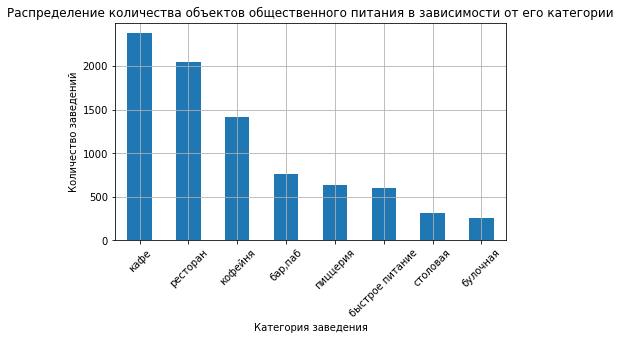

In [23]:
# Визуализируем распределение заведений по категориям с помощью столбчатой диаграммы
plt.figure(figsize=(7, 4))


rest['category'].value_counts().plot(
               kind='bar', 
               rot=45,  
               legend=False,  
               title=f'Распределение количества объектов общественного питания в зависимости от его категории'
)

plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
 
plt.grid()
 
plt.show()

В данных были представлены следующие категории заведений: кафе, ресторан, кофейня, бар, паб, пиццерия, быстрое питание, столовая, булочная. Самые популярные из них - кафе и ресторан, самые непопулярные - столовая и булочная.     

---

### Задача 2


Исследуем распределение заведений по районам Москвы.

In [24]:
# Проверяем распределение заведений по районам Москвы
rest['district'].value_counts()

district
центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: count, dtype: int64

Визуализируем распределение заведений по районам:

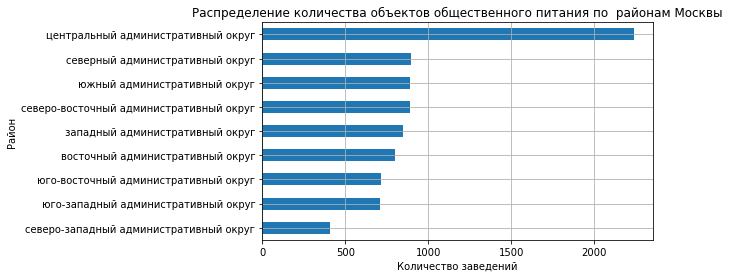

In [25]:
# Визуализируем распределение заведений по районам с помощью столбчатой диаграммы
plt.figure(figsize=(7, 4))


rest['district'].value_counts().sort_values().plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'Распределение количества объектов общественного питания по  районам Москвы'
)

plt.xlabel('Количество заведений')
plt.ylabel('Район')

plt.grid()

plt.show()

В данных присутствуют следующие административные районы: Центральный административный округ, Северный административный округ, Южный административный округ, Северо-Восточный административный округ, Западный административный округ, Восточный административный округ, Юго-Восточный административный округ, Юго-Западный административный округ, Северо-Западный административный округ. 

Больше всего заведений расположено в Центральном административном округе, меньше всего в Северо-Западном. В остальных округах примерно одинаковое количество заведений.

Исследуем распределение категорий заведений в Центральном округе. Для этого создадим датафрейм с данным только для Центрального административного округа.

In [26]:
# Создаем отфильтрованный датафрейм
cao_rest = rest[rest['district'] == 'центральный административный округ']
# Проверяем распределение заведений по категориям
cao_rest['category'].value_counts()

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

Визуализируем распределение заведений по категориям в Центральном административном округе.

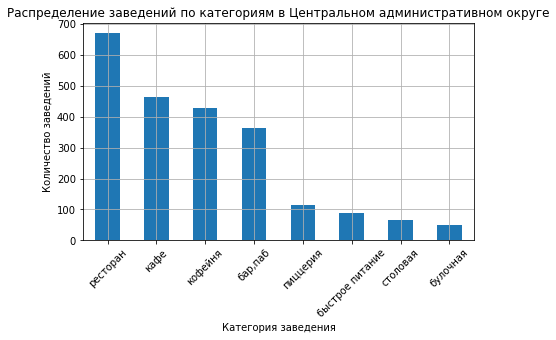

In [27]:
# Визуализируем распределение заведений по категориям с помощью столбчатой диаграммы
plt.figure(figsize = (7, 4))

cao_rest['category'].value_counts().plot(kind = 'bar',
                                         rot = 45,
                                       legend = False,
                                       title = 'Распределение заведений по категориям в Центральном административном округе')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')

plt.grid()

plt.show()

Результаты показывают, что самые популярные категории заведений в Центральном адмнистративном районе это ресторан и кафе, а самые непопулярные - столовая и булочная.

Отметим, что распределение заведений по категориям в Центральном районе похоже на распределение заведений по всей Москве.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 

In [28]:
# Изучим количество сетевых и несетевых заведений
rest['chain'].value_counts()

chain
0    5199
1    3203
Name: count, dtype: int64

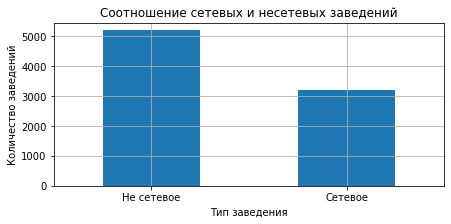

In [29]:
# Визуализируем количество сетевых и несетевых заведений
plt.figure(figsize = (7, 3))

rest['chain'].value_counts().plot(kind = 'bar', 
                                  rot = 0, 
                                  legend = False,
                                  title = 'Соотношение сетевых и несетевых заведений')
plt.xticks(ticks=[0, 1], labels=['Не сетевое', 'Сетевое'], rotation=0)

plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')

plt.grid()
plt.show()

In [30]:
# Изучим соотношение сетевых и несетевых заведений
chain_ratio = rest['chain'].value_counts(normalize=True)*100
chain_ratio

chain
0    61.878124
1    38.121876
Name: proportion, dtype: float64

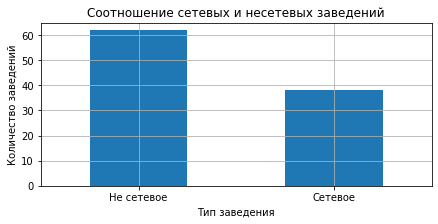

In [31]:
# Визуализируем соотношение сетевых и несетевых заведений
plt.figure(figsize = (7, 3))

chain_ratio.plot(kind = 'bar', 
                rot = 0, 
                legend = False,
                title = 'Соотношение сетевых и несетевых заведений')
plt.xticks(ticks=[0, 1], labels=['Не сетевое', 'Сетевое'], rotation=0)

plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')

plt.grid()
plt.show()

Исходя из визуализаций, можно сделать вывод, что несетевых заведений больше, чем сетевых. Несетевые заведения составляют 61%, сетевые - 39%

Изучим распределение сетевых и несетевых заведений в разрезе категорий. 

In [32]:
# Сгруппируем данные по category и chain, посчитаем количество заведений
category_chain_counts = rest.groupby(['category', 'chain']).size().unstack(fill_value=0)

In [33]:
# Рассчитаем процентное соотношение для сетевых и несетевых заведений
category_chain_counts['no_chain'] = (category_chain_counts[0] / category_chain_counts.sum(axis=1)) * 100
category_chain_counts['chain'] = (category_chain_counts[1] / category_chain_counts.sum(axis=1)) * 100

In [34]:
# Для построения графика оставим только столбцы с процентным соотношением
percent_data = category_chain_counts[['no_chain', 'chain']]
percent_data

chain,no_chain,chain
category,,
"бар,паб",78.010471,19.952246
булочная,38.671875,53.279601
быстрое питание,61.525705,34.912118
кафе,67.213805,31.884234
кофейня,49.044586,49.246104
пиццерия,47.867299,48.467594
ресторан,64.299706,34.610459
столовая,72.063492,22.735288


<Figure size 504x216 with 0 Axes>

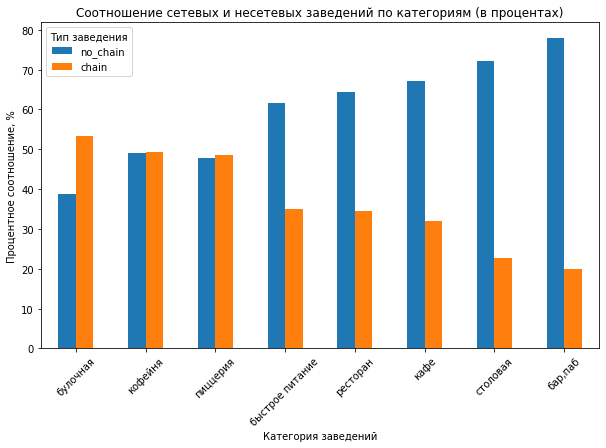

In [35]:
# Визуализируем с помощью столбчатой диаграммы
plt.figure(figsize = (7, 3))
percent_data.sort_values(by = ['chain', 'no_chain'], ascending = False).plot(kind='bar', figsize=(10, 6), rot = 45)

plt.xlabel('Категория заведений')
plt.ylabel('Процентное соотношение, %')
plt.title('Соотношение сетевых и несетевых заведений по категориям (в процентах)')

plt.legend(title='Тип заведения')

plt.show()

Исходя из визуализации, можно сделать вывод, что чаще всего сетевыми являются булочные, кофейни и  пиццерии. Несетевыми чаще всего являются бары, столовые и кафе.

---

### Задача 4


Исследуем количество посадочных мест в заведениях

Оценим статистические показатели столбца `seats`.

In [36]:
# Изучим статистические показатели столбца seats
rest['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

In [37]:
# Изучим 99-й квантиль столбца seats
rest['seats'].quantile(0.99)

625.0

Можно предположить, что в данных встречаются аномальные значения, так как максимальное значение равно 1288, что странно для количества посадочных мест. Также об этом говорит то, что 99% данных находятся ниже 625. Минимальное же значение равно 0, однако это может не быть аномалией и говорить о том, что заведение работает "навынос" и не предполагает посадочных мест. Разница между средним значением и медианой довольно большая, что может говорить о ненормальном распределении данных. Стандартное отклонение достаточно высокое, оно равно 122, при среднем значении 108 это может говорить о том, что данные имеют широкий разброс. Это подтверждает разница между минимальнымм и максимальным значением.

Дополнительно построим гистограмму распределения значений и диаграмму размаха для столбца с балансом.

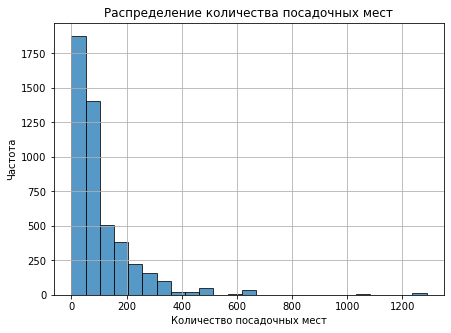

In [38]:
# Построим гистограмму распределения
plt.figure(figsize=(7, 5))

rest['seats'].plot(
                kind='hist', 
                bins=25, 
                alpha=0.75,
                edgecolor='k',
                rot=0, 
)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

plt.grid()

plt.show()

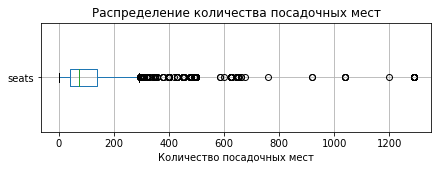

In [39]:
# Строим диаграмму размаха значений 
plt.figure(figsize=(7, 2))


rest.boxplot(column='seats', vert=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

plt.show()

Из визуализаций видно, что распределение данных является негауссовым, пик распределения приходится на левую границу значений, с правой стороны присутствует длинный "хвост". Такие высокие значения можно отнести к выбросам. Однако, возможно, в Москве есть несколько уникальных заведений с большим количеством мест, рассчитанных, например, на банкеты и большие мероприятия. Или же это может быть связано с качеством данных, полученных от пользователей и из окрытых источников.



- Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Построим столбчатую диаграмму для визуализации.

In [40]:
# Изучим моду количества посадочных мест для каждой категории заведения
rest.groupby('category')['seats'].apply(lambda x: x.mode().iloc[0])

category
бар,паб             60.0
булочная             0.0
быстрое питание      0.0
кафе                40.0
кофейня            100.0
пиццерия            40.0
ресторан           100.0
столовая            40.0
Name: seats, dtype: float64

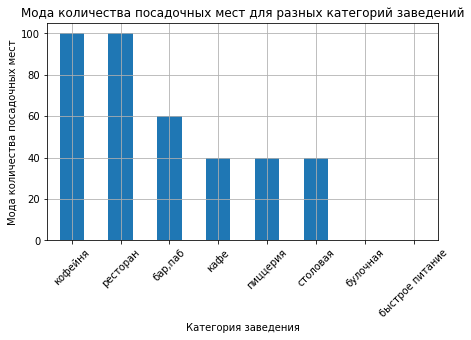

In [41]:
# Построим столбчатую диаграмму
plt.figure(figsize = (7, 4))

rest.groupby('category')['seats'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending = False).plot(kind = 'bar', 
                                                                         rot = 45, 
                                                                         legend = False,
                                                                        title = 'Мода количества посадочных мест для разных категорий заведений')

plt.xlabel('Категория заведения')
plt.ylabel('Мода количества посадочных мест')

plt.grid()
plt.show()

Наибольшее значение моды количества посадочных мест у категорий "кофейня" и "ресторан". Наименьшее значение имеют "булочная" и "быстрое питание", в заведениях этой категории чаще всего нет посадочных мест, для заведений таких категорий это частый случай.

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. 

In [42]:
# Изучим распределение средних рейтингов по категориям заведений
rest.groupby('category')['rating'].mean().sort_values()

category
быстрое питание    4.050249
кафе               4.124285
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290402
пиццерия           4.301264
бар,паб            4.387696
Name: rating, dtype: float64

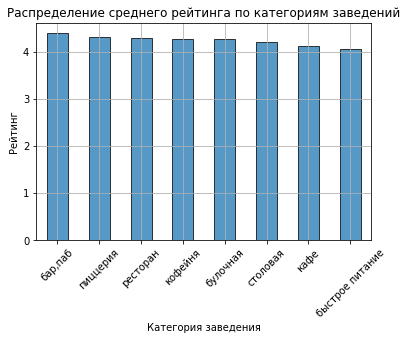

In [43]:
# Визуализируем с помощью гистограммы
rest.groupby('category')['rating'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                              rot = 45,
                                              alpha = 0.75,
                                              edgecolor = 'k')
plt.title('Распределение среднего рейтинга по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Рейтинг')
plt.grid()

plt.show()

   Можно сделать вывод, что средние значения рейтинга для разных категорий заведений отличаются несильно. Самый высокий средний рейтинг имеет категория "бар,паб" - 4,38, самый низкий у категории "быстрое питание" - 4, 05.

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений: построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 

In [44]:
# Построим матрицу корреляций
correlation_matrix = rest[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


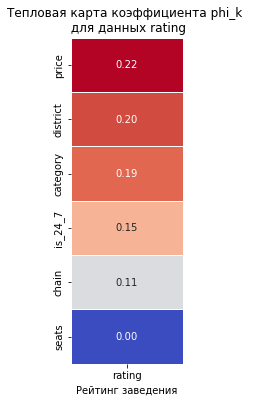

In [45]:
# Визуализируем матрицу с помощью тепловой карты
matrix = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
plt.figure(figsize = (2, 6))

sns.heatmap(matrix, annot = True,
           fmt = '.2f',
           cmap = 'coolwarm',
           linewidths = 0.5,
           cbar = False)
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')
plt.show()

 Наибольшую корреляцию с рейтингом заведения показывает ценовая категория(0.22). Проанализируем эту связь. 
 
 Изучим, существует ли зависимость между категорией зведения и ценовой категорией. Сгруппируем данные по ценовой категории и вычислим медианный рейтинг, затем построим столбчатую диаграмму:

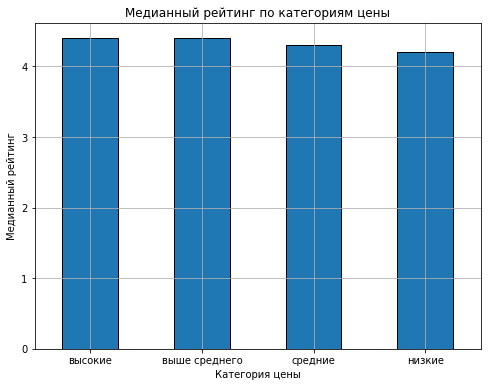

In [46]:
# Группируем данные по категории цены и вычисляем медианный рейтинг
median_ratings = rest.groupby('price')['rating'].median()

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 6))
median_ratings.sort_values(ascending = False).plot(kind='bar', edgecolor='black', rot = 0)
plt.title('Медианный рейтинг по категориям цены')
plt.xlabel('Категория цены')
plt.ylabel('Медианный рейтинг')
plt.grid()
plt.show()

Для всех категорий цен медианный рейтинг отличается незначительно - везде он чуть больше четырех. Из этого можно сделать вывод, что зависимости между категорией цен и рейтингом заведения отсутствует. Об этом также говорит низкое значение корреляции(0.22).

---

### Задача 7



Создадим отфильтрованный датафрейм, включающий только сетевые заведения. Посчитаем количество заведений для каждой сети, выделим топ-15, а также средний рейтинг и категорию для каждой сети. Визуализируем с помощью линейчатых диаграмм.

In [47]:
# Создаем отфильтрованный датафрейм только с сетевыми заведениями
filtered_rest = rest[rest['chain'] == 1]

# Выделяем топ-15 популярных сетей по количеству заведений, а также средний рейтинг и категорию для каждой сети
top_15_chains = filtered_rest.groupby('name').agg(count=('id', 'count'), 
                mean_rating=('rating', 'mean'), 
                category=('category', 'first')).sort_values(by='count', ascending=False).head(15).reset_index()
top_15_chains

,name,count,mean_rating,category
0,шоколадница,120,4.177500,кофейня
1,домино'с пицца,76,4.169737,пиццерия
2,додо пицца,74,4.286486,пиццерия
3,one price coffee,71,4.064789,кофейня
4,яндекс лавка,69,3.872464,ресторан
5,cofix,65,4.075385,кофейня
6,prime,50,4.116000,ресторан
7,хинкальная,44,4.322727,быстрое питание
8,кофепорт,42,4.147619,кофейня
9,кулинарная лавка братьев караваевых,39,4.394872,кафе


Визуализируем топ-15 популярных сетей в Москве:

<Figure size 576x432 with 0 Axes>

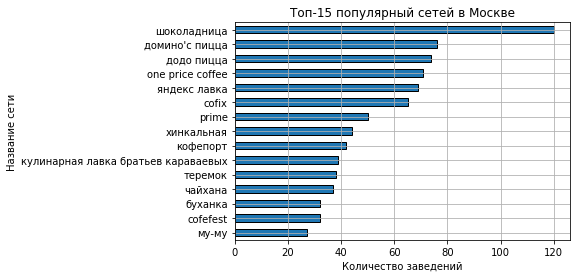

In [48]:
# Визуализируем топ-15 популярных сетей с помощью линейчатой диаграммы
plt.figure(figsize=(8, 6))
top_15_chains.sort_values(by = 'count').plot(kind = 'barh', x = 'name', y = 'count', 
                                             rot = 0, edgecolor = 'k', 
                                             legend = False,
                                             title = 'Топ-15 популярный сетей в Москве')

plt.ylabel('Название сети')
plt.xlabel('Количество заведений')
plt.grid()
plt.show()

Визуализируем распределение среднего рейтинга среди данных сетей:

<Figure size 576x432 with 0 Axes>

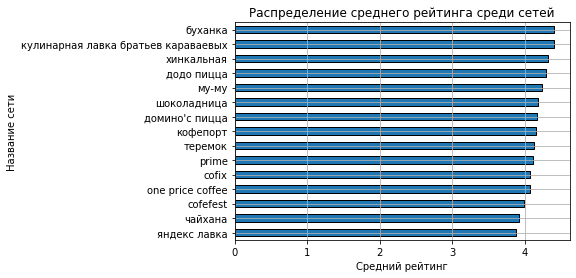

In [49]:
# Визуализируем распределение среднего рейтинга среди сетей с помощью линейчатой диаграммы
plt.figure(figsize=(8, 6))
top_15_chains.sort_values(by = 'mean_rating').plot(kind = 'barh', x = 'name', y = 'mean_rating', 
                                             rot = 0, edgecolor = 'k', 
                                             legend = False,
                                             title = 'Распределение среднего рейтинга среди сетей')

plt.ylabel('Название сети')
plt.xlabel('Средний рейтинг')
plt.grid()
plt.show()

Визуализируем распределение категорий среди данных сетей:

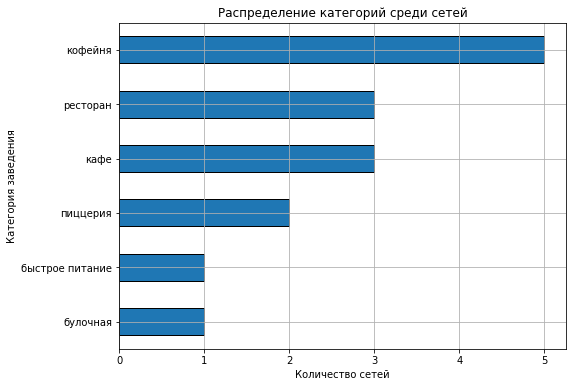

In [50]:
# Визуализируем распределение категорий среди сетей с помощью линейчатой диаграммы
plt.figure(figsize=(8, 6))
top_15_chains.groupby('category')['name'].count().sort_values().plot(kind = 'barh',
                                             rot = 0, edgecolor = 'k', 
                                             legend = False,
                                             title = 'Распределение категорий среди сетей')

plt.ylabel('Категория заведения')
plt.xlabel('Количество сетей')
plt.grid()
plt.show()

Саммая популярная сеть заведений в Москве - "Шоколадница"(120 заведений). 

Среди самых популярных сетей самый высокий средний рейтинг у "Буханки", "Кулинарной лавки братьев Караваевых" и "Хинкальной". Самый низкий у "Яндекс лавки" и "Чайханы".

Среди популярных сетей больше всего имеют категорию "кофейня"(5). Меньше всего сетей имеют категорию "булочная"(1).

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Результат сопроводим подходящими визуализациями.


In [51]:
# Изучим вариацию среднего чека заведения в зависимости от района Москвы
rest.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = False)

district
центральный административный округ         1191.057547
западный административный округ            1053.225490
северный административный округ             927.959627
южный административный округ                834.398089
северо-западный административный округ      822.222930
восточный административный округ            820.626923
юго-западный административный округ         792.561702
северо-восточный административный округ     716.611296
юго-восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

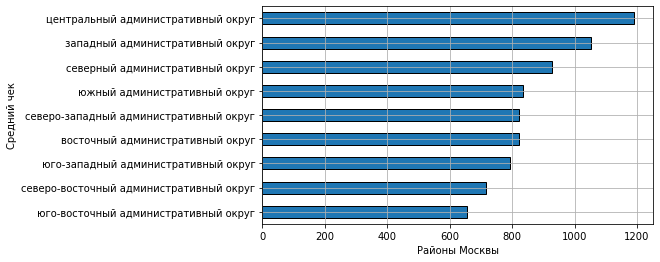

In [52]:
# Визуализируем вариацию среднего чека в зависимости от района
plt.figure(figsize = (7, 4))
rest.groupby('district')['middle_avg_bill'].mean().sort_values().plot(kind = 'barh', 
                                                       rot = 0,
                                                       edgecolor = 'k',
                                                       legend = False)
plt.xlabel('Районы Москвы')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

---


Самый высокий средний чек - в Центральном административном округе (1191 руб.) и Западном административном округе(1053 руб.), самый низкий средний чек - в Северо-Восточном(716 руб.) и Юго-Восточном(654 руб.) округах. Из этих данных можно сделать вывод, что значение среднего чека самое большое в центре города, и уменьшается в удаленных от центра районах.

---

### Промежуточный вывод


- В Москве чаще всего встречаются заведения категории "кафе" или "ресторан", реже всего - категории "столовая" или "булочная".
- Больше всего заведения расположено в Центральном округе, меньше всего - в Северо-Западном.
- В Москве больше несетевых заведений, чем сетевых.
- Для разных категорий заведений характерен примерно одинаковый средний рейтинг.
- Самое популярное сетевое заведение - "Шоколадница"
- Самый высокий средний чек имеют заведения, расположенные в центре Москвы.

## 4. Итоговый вывод и рекомендации



В ходе исследования проанализировали данные 8406 заведений в Москве. Данные включали информацию о названии и местоположении заведений, особенностях работы и ценовой политике. Необходимо было проанализировать рынок с целью помочь инвесторам найти подходящее место. Рассматривались такие данные, как категория заведения и район, в котором оно расположено, является ли заведение сетью, количество посадочных мест, ценовая политика.

* В данных были представлены следующие категории заведений: кафе, ресторан, кофейня, бар, паб, пиццерия, быстрое питание, столовая, булочная. Самое большое количество заведений имеют категорию "кафе", самое меньшее - категорию "булочная".
* Больше всего заведений расположено в Центральном административном округе Москвы, меньше всего в Северо-Западном. В остальных округах примерно одинаковое количество заведений.
* Самые популярные категории заведений в Центральном административном районе это ресторан и кафе, а самые непопулярные - столовая и булочная.
* В Москве больше несетевых заведений, чем сетевых. Чаще всего сетевыми являются булочные, кофейни и  пиццерии. Несетевыми чаще всего являются бары, столовые и кафе.
* В данных о посадочных местах присутствуют аномально большие значения, которые могут быть связаны с качеством данных.
* Для разных  типов общепита усредненный рейтинг очень похож - чуть больше `4`.
* Наиболее популярная категория для сетевых заведений - "кофейня", наименее популярная - "булочная".
* В центре Москвы более высокая ценовая политика, чем в отдаленных районах.

#### Рекомендации
- Выбор популярной категории (кафе, кофейня, ресторан) для минимизации рисков.
- При желании открыть сетевое заведение - рассмотреть категорию "кофейня", при желании открыть несетевое заведение - рассмотреть категориию "кафе". Однако, важно учитывать, что несетевые заведения более популярны.
- Рассмотрение Центрального административного округа для открытия заведения, однако необходимо быть готовыми к высокой арендной плате и конкуренции. В менее популярных районах же можно найти менее конкурентные локации.
- Уделение внимания качеству продукции и сервиса для поддержания высокого рейтинга.
- Предложение уникальной концепции для того, чтобы выделиться среди конкурентов. Например, уникальное тематическое кафе, ресторан с шоу-кухней, кофейня с необычными авторскими напитками.
- Анализ конкурентов в выбранной локации.